### ICDAR

In [24]:
import os
import pandas as pd
from PIL import Image
path = os.getcwd()
removepath = os.path.join(path, "dataset")
path = os.path.join(path, "icdar")
path

'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar'

In [25]:
counter = 0;
filepaths = []
for dir in os.listdir(path):
    if (os.path.isdir(os.path.join(path, dir))):
        sub = os.path.join(os.path.join(path, dir))
        for dir_s in os.listdir(sub):
            if (os.path.isdir(os.path.join(sub, dir_s))):
                ssub = os.path.join(sub, dir_s)
                files = os.listdir(ssub)
                for file in files:
                    filepaths.append(os.path.join(ssub, file))
            else:
                filepaths.append(os.path.join(sub, dir_s))
    else:
        filepaths.append(os.path.join(path, dir))

df = pd.DataFrame([filepaths]).T
df.columns = ["path"]

for filepath in df["path"]:
    print(filepath)
    img = Image.open(filepath)
    img.save(os.path.join(removepath, f"{counter}.bmp"))
    counter+=1


c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\1.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\10.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\11.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\12.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\15.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\16.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\17.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\18.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\19.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\2.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\20.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\21.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\22.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\24.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\25.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\3.bmp
c:\Users\User\Desktop\C_VSCode\icdar\icdar\ocr0219\4.bmp
c:\Users\User\Desk

### Analysis ICDAR Dataset

In [2]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import cv2
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

path = os.path.join(os.getcwd(), "icdar2015")
train_image_path = os.path.join(path, [p for p in os.listdir(path) if p.find("training_images") != -1][0])
train_image_files = [os.path.join(train_image_path, file) for file in os.listdir(train_image_path) if file.endswith("jpg")]
train_label_path = os.path.join(path, [p for p in os.listdir(path) if p.find("training_localization") != -1][0])
train_label_files = [os.path.join(train_label_path, file) for file in os.listdir(train_label_path) if file.endswith("txt")]
train_image_files, train_label_files

(['c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_1.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_10.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_100.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_1000.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_101.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_102.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_103.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_104.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_105.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_106.jpg',
  'c:\\Users\\User\\Desktop\\C_VSCode\\icdar\\icdar2015\\ch4_training_images\\img_

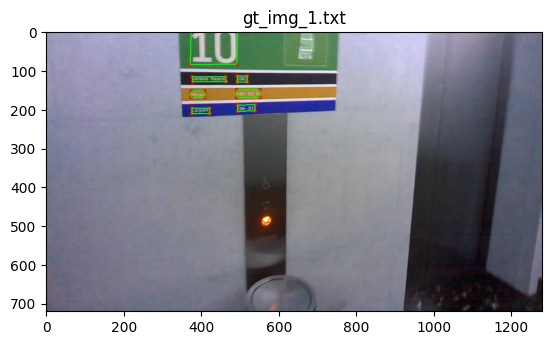

SystemExit: 

c:\Users\User\anaconda3\envs\openmmlab_cpu\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import sys

for idx, labelfile in enumerate(train_label_files):
    f = open(labelfile, 'r')
    try:
        df = pd.read_csv(labelfile, on_bad_lines="skip", sep=",", header=None)
        # print(df)
    except pd.errors.ParserError as e:
        print(f"Error reading {labelfile}: {e}")
    image = Image.open(train_image_files[idx])

    img = cv2.imread(train_image_files[idx])
    
    for dfidx in df.index:
        Point1 = (df[df.columns[0]].iloc[dfidx], df[df.columns[1]].iloc[dfidx])
        Point2 = (df[df.columns[2]].iloc[dfidx], df[df.columns[3]].iloc[dfidx])
        Point3 = (df[df.columns[4]].iloc[dfidx], df[df.columns[5]].iloc[dfidx])
        Point4 = (df[df.columns[6]].iloc[dfidx], df[df.columns[7]].iloc[dfidx])
        points = np.array([[df[df.columns[0]].iloc[dfidx], df[df.columns[1]].iloc[dfidx]], 
                        [df[df.columns[2]].iloc[dfidx], df[df.columns[3]].iloc[dfidx]], 
                        [df[df.columns[4]].iloc[dfidx], df[df.columns[5]].iloc[dfidx]], 
                        [df[df.columns[6]].iloc[dfidx], df[df.columns[7]].iloc[dfidx]]], 
                        dtype=np.int32)
        
        cv2.circle(img, Point1,
                   5, (255, 0, 0), -1)
        cv2.circle(img, Point2,
                   5, (255, 0, 0), -1)
        cv2.circle(img, Point3,
                   5, (255, 0, 0), -1)
        cv2.circle(img, Point4,
                   5, (255, 0, 0), -1)
        
        cv2.polylines(img, [points], isClosed=True, 
                      color=(0, 255, 0), thickness=2)

    plt.imshow(img)
    plt.title(os.path.basename(labelfile))
    plt.show()

    sys.exit()
